### CALEB GOODRICH

# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries. 

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1wpphG0kRidK8W9DT79spBufId8jWCUvC?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1pmnps16-kI8VJaIizNXaOFyW0IZs_pZo/view?usp=sharing)
1.  [Quebec Business Info](https://drive.google.com/file/d/1eT72WiYI7xXT7wiNfo2w1uhxVC0qIage/view?usp=sharing)


In [6]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Problem 1 (2 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **persons review of a particular company.**.
1. There are **208166** rows in the dataset
    1. There are **9** columns in the dataset excluding the index.
1. The first review is written on **2007-01-02 00:00:00**.
    1. The last review is written on **2019-12-13 00:00:00**.

In [7]:
# import any necessary libraries here
from pandas.io.parsers.c_parser_wrapper import is_index_col
import os
import pandas as pd


In [8]:
# First, list the folder containing your data
# fpath = 'path/to/your/data'
# os.listdir(fpath) 
# this should return a list containing the quebec_biz 
# and quebec_yelp_reviews datasets
fpath = 'drive/My Drive/Analytics/Datasets/quebec'
os.listdir(fpath)


['quebec_biz.csv', 'quebec_yelp_reviews.csv', 'subsetOfYelpReviews.csv']

In [9]:
# read in the reviews data
# pick a variable name for the reviews dataframe
# and set its value by reading in the appropriate dataset
# df = pd.read_csv(fpath + 'review_dataset_filename.csv', index_col = 0) || Caleb Note, should be fpath + '/review_dataset_filename.csv'
# you can call the dataframe something other than df
yelpReviews = pd.read_csv(fpath + '/quebec_yelp_reviews.csv', index_col = 0)


In [10]:
# preview the dataframe's first 5 rows using the .head() method
# what unit of observation does each row represent?
yelpReviews.head()



,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


In [11]:
# compute the shape of the dataset to return (rows, columns)
# use the .shape method
yelpReviews.shape



(208166, 9)

In [12]:
# take a look at the column names by accessing the dataframe's column attribute, 
# e.g. df.columns.values (but replace df with the name you picked)
yelpReviews.columns.values



array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [13]:
# find the date column above, convert the column to pandas datetime series
# using the pd.to_datetime(....) function
yelpReviews['Date'] = pd.to_datetime(yelpReviews.date)

In [14]:
# find the smallest date (use the .min method)
yelpReviews.Date.min()



Timestamp('2007-01-02 00:00:00')

In [15]:
# find the largest date (use the .max method)
yelpReviews.Date.max()




Timestamp('2019-12-13 00:00:00')

# Problem 2 (2 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [16]:
# pick a variable name and set it equal to the approriate subset of your dataframe
# (you can use the same variable name as the original dataframe)
# remember to select the dates with 2 conditions:
# >= '2016/5/1'
# < '2019/6/1'
yelpReviews = yelpReviews[(yelpReviews['Date'] >= '2016/5/1') & (yelpReviews['Date'] < '2019/6/1')]


In [17]:
# check the minimum and maximum dates of the resulting dataframe to confirm you've done this correctly
# min date
yelpReviews['Date'].min()




Timestamp('2016-05-01 00:00:00')

In [18]:
# max date
yelpReviews.Date.max()




Timestamp('2019-05-31 00:00:00')

In [19]:
# save the dataset somewhere, give it a meaningful file name
subsetOfYelpReviews = yelpReviews
subsetOfYelpReviews.to_csv('drive/My Drive/Analytics/Datasets/quebec/subsetOfYelpReviews.csv')

# Problem 3 (3 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/1RKy2g2aWOitE2rCQdZli8ERKdrtqU6Cl?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of star ratings.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average helpfulness votes per review in Quebec? 
1. Come up with 2 potential explanations for the pattern(s) you've noticed.

## Problem 3 Answer (edit this cell)
1. In the months ~September - February the reviews spike and then drop significantly as you get closer to the middle of the year.
1. (1st) Perhaps people are in the holiday spirit and all the workers are super nice and helpful but then after thats over the workers go back to how they normally are which isnt as nice and helpful as before. This could definitely lead to the spikes and troughs we see here. \
(2nd) These reviews are located in Quebec, Canada so I imagine in the winters people don't go out to local businesses as much. This could lead to the workers having to deal with less customers and then being in better moods when they do deal with customers. I know when I worked retail, the less people I had to deal with the better mood I was in. 

In [20]:
# create 'ym' column
subsetOfYelpReviews['ym'] = subsetOfYelpReviews.Date.dt.to_period('M')

In [21]:
# check that you've created it correctly by finding the unique values of ym
# select the ym column and use the .unique() method
subsetOfYelpReviews['ym'].unique()




<PeriodArray>
['2016-07', '2016-09', '2018-09', '2017-05', '2017-06', '2017-07', '2016-05',
 '2018-08', '2017-08', '2017-10', '2016-10', '2018-07', '2016-08', '2016-06',
 '2017-04', '2017-01', '2018-06', '2018-02', '2018-05', '2017-09', '2018-04',
 '2018-03', '2016-12', '2016-11', '2017-02', '2017-11', '2017-03', '2018-01',
 '2018-10', '2017-12', '2019-01', '2018-12', '2018-11', '2019-04', '2019-03',
 '2019-02', '2019-05']
Length: 37, dtype: period[M]

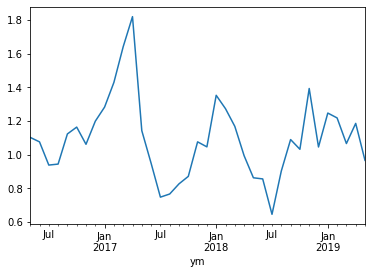

In [33]:
# create the plot using a groupby summary + .plot method
# refer to notes for examples
subsetOfYelpReviews.groupby(['ym'])['useful'].mean().plot()




# Probelm 4 (4 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (2 pts)
1. What is the observational unit of this dataset?
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)? 

**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where: 
* x-axis is `ym` 
* y-axis is average star rating 
* there are 2 lines: 1. for currently open businesses and 2. closed businesses 
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (2 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **business. It has the name, the location, what they sell and some more stuff.**
1. We should merge on **the business ID.**

### Part B

1. For almost all of the graph the open businesses are 0.1-0.2 stars ahead of the closed businesses. This is true until January 2019 where the closed businesses had a large spike upwards.
1. 2 possible reasons are:
    1. Businesses that have had to shut down were probably not doing that well, which would reflect on peoples ratings of them. For example a restaurant that has terrible food will have terrible reviews and then people will eventually stop going to it and it will shut down. Whereas businesses that are open have to be doing relatively well which would reflect on their reviews. 
    1. The closed businesses have much less consistent reviews. They have way bigger dips in review stars then the open businesses. This could suggest that the business itself is very inconsistent leading people to have bad experiences with them which could lead to the business closing down.   

In [23]:
# read in the business info file, call the dataframe biz, e.g. biz = pd.read_csv(...)
biz = pd.read_csv('drive/My Drive/Analytics/Datasets/quebec/quebec_biz.csv')



In [30]:
# Take a look at the first few rows to determine the observational unit
biz.head(3)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
0,2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
1,31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN


In [25]:
# merge the 2 datasets
merged = biz.merge(yelpReviews,how = 'left', on = 'business_id')



In [28]:
# take a look at the columns of the resulting dataframe
# make sure it has all the columns from both the review and business datasets
merged.columns



Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'biz_stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'useful', 'funny', 'cool', 'text', 'date', 'stars', 'Date', 'ym'],
      dtype='object')

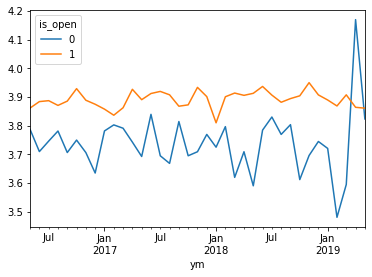

In [29]:
# make your plot, use groupby summary and unstack syntax 
# to construct plot, see examples from notes

merged.groupby(['ym','is_open'])['stars'].mean().unstack('is_open').plot()

